<a href="https://colab.research.google.com/github/AlfonsoVasquezC/DataFiles/blob/main/Actividad_Semanal_6_Visualizaci%C3%B3n_A00820656.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal 6 - Visualización

**Datos Generales**
**Nombre de la entrega:** Actividad Semanal 6 - Visualización

**Nombre del Alumno:** Juan Alfonso Vasquez Chapoi 

**Matrícula:** A00820656

**Materia:** Ciencia y Analítica de Datos

**Profesor:** María de la Paz Rico Fernández

**Tutor:** Bernardo Charles Canales

In [134]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing

### 1. Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 

**BASE DE DATOS SUGERIDA**

**El presente conjunto de datos tiene como nombre "The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients."**

**La descripción de las variables es la siguiente:**

1. y (Sí = 1, No = 0),como la variable independiente

**Variables dependientes:**

1. X1: Cantidad del prestamo actual.
2. X2: Genero (1 = hombre; 2 = mujer). 
3. X3: Educación (1 = posgrado; 2 = universidad; 3 = preparatoria; 4 = otro). 
4. X4: Estado Civil (1 = Casado; 2 = Soltero; 3 = otro). 
5. X5: Edad (Año). 

*X6 - X11: Historia de pago previo (2005)*

6. X6 = Repago September
7.  X7 = Repago Agosto, . . .
11. X11 = Repago Abril

**La escala es: -1 = corriente; 1 = atraso un mes; 2 = atraso dos meses; . . .; 8 = atraso ocho meses; 9 = atraso 9 o más meses.**


*X12 - X17 Estado de cuenta (USD).* 

12. X12 = Estado de cuenta en Septiembre
13. X13 = Estado de cuenta en Agosto . . .; 
17. X17 = Estado de cuenta en Aabril

*X18-X23: Monto del pago previo (USD).* 

18. X18 = Cantidad pagada en Septiembre
19. X19 = Cantidad pagada en Agosto . . .;
23. X23 = Cantidad pagada en Abril

**El conjunto de Datos fue generado por:**
Yeh, I. C., & Lien, C. H. (2009).


In [135]:
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

df = pd.read_csv(path)
headers = ['ID','Amount of the given credit', 'Gender', 'Education', 'Marital Status', 'Age', 
           'Repay Sep', 'Repay Aug', 'Repay Jul', 'Repay Jun', 'Repay May', 'Repay April',
           'BillStmnt Sep', 'BillStmnt Aug', 'BillStmnt Jul', 'BillStmnt Jun', 'BillStmnt May', 'BillStmnt April',
           'PrevPay Sep', 'PrevPay Aug', 'PrevPay Jul', 'PrevPay Jun', 'PrevPay May', 'PrevPay April',
           'y']
df.columns = headers
df

,ID,Amount of the given credit,Gender,Education,Marital Status,Age,Repay Sep,Repay Aug,Repay Jul,Repay Jun,...,BillStmnt Jun,BillStmnt May,BillStmnt April,PrevPay Sep,PrevPay Aug,PrevPay Jul,PrevPay Jun,PrevPay May,PrevPay April,y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


### 2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [136]:
df.shape

(30000, 25)

In [137]:
df.columns

Index(['ID', 'Amount of the given credit', 'Gender', 'Education',
       'Marital Status', 'Age', 'Repay Sep', 'Repay Aug', 'Repay Jul',
       'Repay Jun', 'Repay May', 'Repay April', 'BillStmnt Sep',
       'BillStmnt Aug', 'BillStmnt Jul', 'BillStmnt Jun', 'BillStmnt May',
       'BillStmnt April', 'PrevPay Sep', 'PrevPay Aug', 'PrevPay Jul',
       'PrevPay Jun', 'PrevPay May', 'PrevPay April', 'y'],
      dtype='object')

In [138]:
df.head()

,ID,Amount of the given credit,Gender,Education,Marital Status,Age,Repay Sep,Repay Aug,Repay Jul,Repay Jun,...,BillStmnt Jun,BillStmnt May,BillStmnt April,PrevPay Sep,PrevPay Aug,PrevPay Jul,PrevPay Jun,PrevPay May,PrevPay April,y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [139]:
df.dtypes

ID                              int64
Amount of the given credit      int64
Gender                        float64
Education                     float64
Marital Status                float64
Age                           float64
Repay Sep                     float64
Repay Aug                     float64
Repay Jul                     float64
Repay Jun                     float64
Repay May                     float64
Repay April                   float64
BillStmnt Sep                 float64
BillStmnt Aug                 float64
BillStmnt Jul                 float64
BillStmnt Jun                 float64
BillStmnt May                 float64
BillStmnt April               float64
PrevPay Sep                   float64
PrevPay Aug                   float64
PrevPay Jul                   float64
PrevPay Jun                   float64
PrevPay May                   float64
PrevPay April                 float64
y                             float64
dtype: object

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   Amount of the given credit  30000 non-null  int64  
 2   Gender                      29999 non-null  float64
 3   Education                   29998 non-null  float64
 4   Marital Status              29998 non-null  float64
 5   Age                         29995 non-null  float64
 6   Repay Sep                   29997 non-null  float64
 7   Repay Aug                   29995 non-null  float64
 8   Repay Jul                   29993 non-null  float64
 9   Repay Jun                   29991 non-null  float64
 10  Repay May                   29984 non-null  float64
 11  Repay April                 29986 non-null  float64
 12  BillStmnt Sep               29989 non-null  float64
 13  BillStmnt Aug               299

In [141]:
df.isna()

,ID,Amount of the given credit,Gender,Education,Marital Status,Age,Repay Sep,Repay Aug,Repay Jul,Repay Jun,...,BillStmnt Jun,BillStmnt May,BillStmnt April,PrevPay Sep,PrevPay Aug,PrevPay Jul,PrevPay Jun,PrevPay May,PrevPay April,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [142]:
df.isna().sum()

ID                             0
Amount of the given credit     0
Gender                         1
Education                      2
Marital Status                 2
Age                            5
Repay Sep                      3
Repay Aug                      5
Repay Jul                      7
Repay Jun                      9
Repay May                     16
Repay April                   14
BillStmnt Sep                 11
BillStmnt Aug                 11
BillStmnt Jul                 13
BillStmnt Jun                 15
BillStmnt May                 17
BillStmnt April               10
PrevPay Sep                    8
PrevPay Aug                    9
PrevPay Jul                    8
PrevPay Jun                   11
PrevPay May                   11
PrevPay April                  5
y                              3
dtype: int64

### 3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [143]:
df.dropna(axis = 0, how = 'any', inplace = True)

In [144]:
df

,ID,Amount of the given credit,Gender,Education,Marital Status,Age,Repay Sep,Repay Aug,Repay Jul,Repay Jun,...,BillStmnt Jun,BillStmnt May,BillStmnt April,PrevPay Sep,PrevPay Aug,PrevPay Jul,PrevPay Jun,PrevPay May,PrevPay April,y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


### 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [145]:
df.describe()

,ID,Amount of the given credit,Gender,Education,Marital Status,Age,Repay Sep,Repay Aug,Repay Jul,Repay Jun,...,BillStmnt Jun,BillStmnt May,BillStmnt April,PrevPay Sep,PrevPay Aug,PrevPay Jul,PrevPay Jun,PrevPay May,PrevPay April,y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


### 5. Realiza el conteo de las variables categóricas

In [167]:
names = ['ID','Amount of the given credit', 'Gender', 'Education', 'Marital Status', 'Age', 
           'Repay Sep', 'Repay Aug', 'Repay Jul', 'Repay Jun', 'Repay May', 'Repay April',
           'BillStmnt Sep', 'BillStmnt Aug', 'BillStmnt Jul', 'BillStmnt Jun', 'BillStmnt May', 'BillStmnt April',
           'PrevPay Sep', 'PrevPay Aug', 'PrevPay Jul', 'PrevPay Jun', 'PrevPay May', 'PrevPay April',
           'y']

df_var_num = ['Amount of the given credit', 'Age', 'Repay Sep', 'Repay Aug', 'Repay Jul', 'Repay Jun', 'Repay May', 'Repay April',
           'BillStmnt Sep', 'BillStmnt Aug', 'BillStmnt Jul', 'BillStmnt Jun', 'BillStmnt May', 'BillStmnt April',
           'PrevPay Sep', 'PrevPay Aug', 'PrevPay Jul', 'PrevPay Jun', 'PrevPay May', 'PrevPay April']

df_var_num2 = ['Amount of the given credit', 'Age','BillStmnt Sep', 'BillStmnt Aug', 'BillStmnt Jul', 'BillStmnt Jun', 'BillStmnt May', 'BillStmnt April',
           'PrevPay Sep', 'PrevPay Aug', 'PrevPay Jul', 'PrevPay Jun', 'PrevPay May', 'PrevPay April']

df_var_cat = ['Marital Status']
df_var_bin = ['Gender']
df_var_ord = ['Education']

df_var_categorical_all = df_var_cat + df_var_bin + df_var_ord


In [147]:
for i in df_var_categorical_all:
  result = df[df_var_categorical_all][i].value_counts()
  print(result, '\n')



2.0    15939
1.0    13643
3.0      322
0.0       54
Name: Marital Status, dtype: int64 

2.0    18095
1.0    11863
Name: Gender, dtype: int64 

2.0    14009
1.0    10572
3.0     4909
5.0      280
4.0      123
6.0       51
0.0       14
Name: Education, dtype: int64 



In [148]:
df['Marital Status'] = df['Marital Status'].map({2.0:2.0, 1.0:1.0, 3.0:3.0,      0.0:3.0})
df['Education'] = df['Education'].map({2.0:2.0, 1.0:1.0, 3.0:3.0, 4.0:4.0,       5.0:4.0, 6.0:4.0, 0.0:4.0})

for i in df_var_categorical_all:
  result = df[df_var_categorical_all][i].value_counts()
  print(result, '\n')

2.0    15939
1.0    13643
3.0      376
Name: Marital Status, dtype: int64 

2.0    18095
1.0    11863
Name: Gender, dtype: int64 

2.0    14009
1.0    10572
3.0     4909
4.0      468
Name: Education, dtype: int64 



### 6. Escala los datos, si consideras necesario

In [149]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


pipeline_num = Pipeline(steps = [('scaler', StandardScaler())])

pipeline_cat = Pipeline(steps = [('OneHE', OneHotEncoder(handle_unknown= 'ignore'))])

# Aplicamos las transformaciones a las columnas correspondientes con ColumnTransformer

ColumnTransformers = ColumnTransformer( transformers = [ 
                                                        ('scalernum', pipeline_num, df_var_num),
                                                        ('oneHE', pipeline_cat, df_var_categorical_all)],
                                                        remainder = 'passthrough')

In [150]:
dftransf = df.iloc[:, 1:]
dftransf = pd.DataFrame(dftransf)
dftransf = ColumnTransformers.fit_transform(dftransf)
dftransf = pd.DataFrame(dftransf)
dftransf

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.137363,-1.246282,1.794642,1.782583,-0.696680,-0.666630,-1.530700,-1.486513,-0.642497,-0.647359,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.366561,-1.029224,-0.874468,1.782583,0.139436,0.189241,0.235635,1.993916,-0.659205,-0.666697,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-0.597802,-0.160996,0.015235,0.111950,0.139436,0.189241,0.235635,0.253701,-0.298738,-0.493940,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.906122,0.164590,0.015235,0.111950,0.139436,0.189241,0.235635,0.253701,-0.057797,-0.013586,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.906122,2.335161,-0.874468,0.111950,-0.696680,0.189241,0.235635,0.253701,-0.578648,-0.611297,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,0.404240,0.381647,0.015235,0.111950,0.139436,0.189241,0.235635,0.253701,1.869050,2.016773,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
29954,-0.135321,0.815761,-0.874468,-0.723367,-0.696680,-0.666630,0.235635,0.253701,-0.672765,-0.665250,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
29955,-1.060283,0.164590,3.574048,2.617900,1.811669,-0.666630,0.235635,0.253701,-0.647220,-0.643793,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
29956,-0.674882,0.598704,0.904939,-0.723367,0.139436,0.189241,0.235635,-0.616406,-0.717937,0.409753,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [154]:
dftransf.iloc[:, 29].isna().sum()

0

In [155]:
OneHE_names = ColumnTransformers.transformers_[1][1]['OneHE'].get_feature_names_out(['Marital Status', 'Gender', 'Education'])
Column_names = []
for i in OneHE_names:
  Column_names.append(i)
Column_names = df_var_num + Column_names + ['y']


In [156]:
dftransf.columns = Column_names

In [159]:
dftransf[df_var_num2 + ['y']]

,Amount of the given credit,Age,BillStmnt Sep,BillStmnt Aug,BillStmnt Jul,BillStmnt Jun,BillStmnt May,BillStmnt April,PrevPay Sep,PrevPay Aug,PrevPay Jul,PrevPay Jun,PrevPay May,PrevPay April,y
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485,1.0
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054,1.0
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407,0.0
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269,0.0
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,0.404240,0.381647,1.869050,2.016773,2.325211,0.694875,-0.149477,-0.384512,0.171131,0.610450,-0.012796,-0.113733,0.012988,-0.237269,0.0
29954,-0.135321,0.815761,-0.672765,-0.665250,-0.627383,-0.532915,-0.577704,-0.652714,-0.231017,-0.104084,0.213973,-0.299878,-0.314124,-0.293485,0.0
29955,-1.060283,0.164590,-0.647220,-0.643793,-0.638106,-0.348043,-0.324651,-0.327833,-0.341890,-0.257018,0.952008,-0.040181,-0.183279,-0.119217,1.0
29956,-0.674882,0.598704,-0.717937,0.409753,0.421878,0.147516,-0.468128,0.168744,4.842633,-0.109159,-0.229915,-0.185244,3.150905,-0.192072,1.0


### 7. Reduce las dimensiones con PCA, si consideras necesario.
Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [161]:
pcs = PCA()

pcs.fit(dftransf)

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }).transpose()

pcsSummary.columns = [f'PC{i}' for i in range(1, len(pcsSummary.columns) + 1)]                        
pcsSummary.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
Standard deviation,2.5580,2.0239,1.2288,1.0828,0.9617,0.9425,0.9349,0.8858,0.8561,0.8443,...,0.3631,0.2648,0.2019,0.1590,0.1525,0.1422,0.1352,0.0,0.0,0.0
Proportion of variance,0.3003,0.1880,0.0693,0.0538,0.0424,0.0408,0.0401,0.0360,0.0336,0.0327,...,0.0061,0.0032,0.0019,0.0012,0.0011,0.0009,0.0008,0.0,0.0,0.0
Cumulative proportion,0.3003,0.4883,0.5576,0.6114,0.6538,0.6946,0.7347,0.7707,0.8043,0.8370,...,0.9909,0.9941,0.9960,0.9972,0.9982,0.9992,1.0000,1.0,1.0,1.0


In [162]:
def plot_pca(pcs: PCA):
  PC_components = np.arange(pcs.n_components_) + 1

  sns.set(style = 'whitegrid', 
              font_scale = 1.2
              )

  fig, ax = plt.subplots(figsize=(20, 7))

  sns.barplot(x = PC_components, 
                  y = pcs.explained_variance_ratio_, 
                  color = 'b'
                  )

  sns.lineplot(x = PC_components-1, 
                  y = np.cumsum(pcs.explained_variance_ratio_), 
                  color = 'black', 
                  linestyle = '-', 
                  linewidth = 2, 
                  marker = 'o', 
                  markersize = 8
                  )
  
 
  plt.title('Scree Plot')
  plt.xlabel('N-th Principal Component')
  plt.ylabel('Variance Explained')
  plt.ylim(0, 1)
  plt.show()

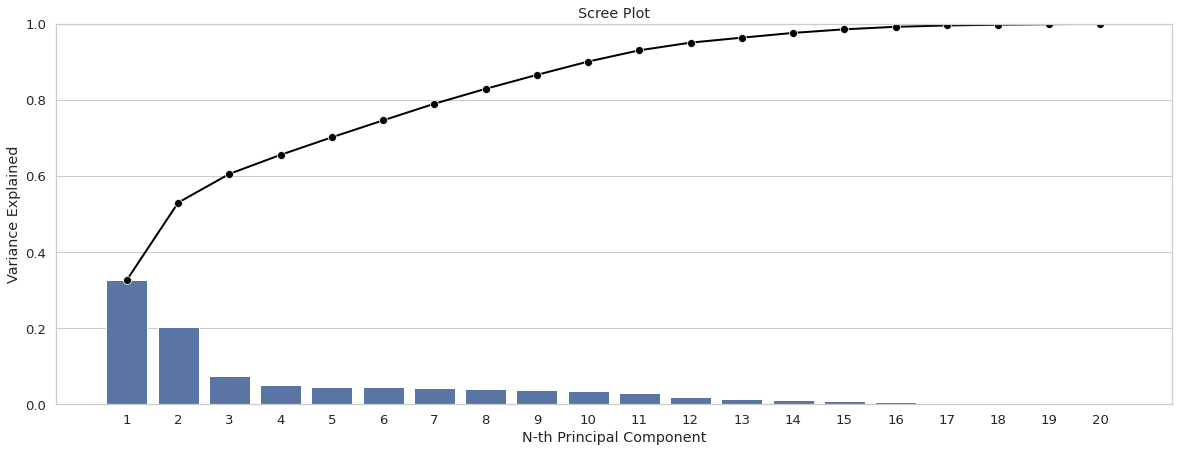

In [99]:
plot_pca(pcs)

#### 7.2. Indica la importancia de las variables en cada componente

In [163]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary.columns,
                                index=dftransf.columns
                                )

pcsComponents_df.iloc[:,:8]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Amount of the given credit,0.068579,0.314158,0.050951,0.129039,-0.164843,-0.015381,-0.072568,0.089752
Age,0.013261,0.068408,-0.054292,0.875504,0.035089,0.002890,0.019453,-0.008296
Repay Sep,0.161393,-0.299360,-0.004423,0.042888,-0.092905,0.011503,-0.009344,-0.018196
Repay Aug,0.194312,-0.335422,0.044361,0.040469,-0.111585,0.006812,-0.016501,-0.007234
Repay Jul,0.200488,-0.344220,0.099547,0.040554,-0.056280,-0.024589,-0.017466,-0.022530
Repay Jun,0.207307,-0.344874,0.136549,0.045034,-0.011923,-0.046374,0.016375,-0.036032
Repay May,0.211184,-0.331911,0.155732,0.035216,0.036536,-0.015026,0.012144,0.095830
Repay April,0.206606,-0.306241,0.153751,0.029457,0.053943,0.072861,-0.040442,0.042404
BillStmnt Sep,0.334270,0.140759,-0.223692,-0.029777,-0.048518,-0.029478,-0.048661,0.001085
BillStmnt Aug,0.345689,0.141070,-0.193294,-0.034556,0.022742,-0.078527,-0.039739,-0.045280


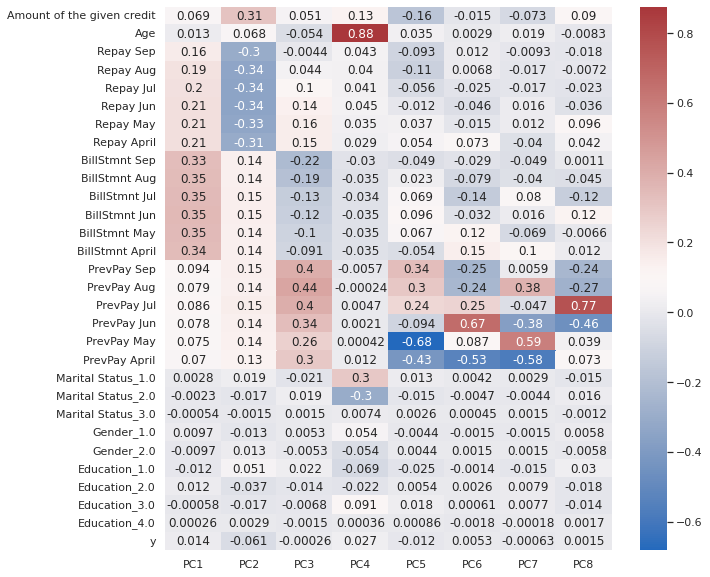

In [164]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pcsComponents_df.iloc[:,:8], cmap = 'vlag',annot = True, fmt = ".2g", ax = ax)

### 8. Elabora los histogramas de los atributos para visualizar su distribución

In [168]:
df_var_num2
df_var_num_y = df_var_num2 + ['y']
df_var_num2

['Amount of the given credit',
 'Age',
 'BillStmnt Sep',
 'BillStmnt Aug',
 'BillStmnt Jul',
 'BillStmnt Jun',
 'BillStmnt May',
 'BillStmnt April',
 'PrevPay Sep',
 'PrevPay Aug',
 'PrevPay Jul',
 'PrevPay Jun',
 'PrevPay May',
 'PrevPay April']

Histogramas de datos númericos sin normalización

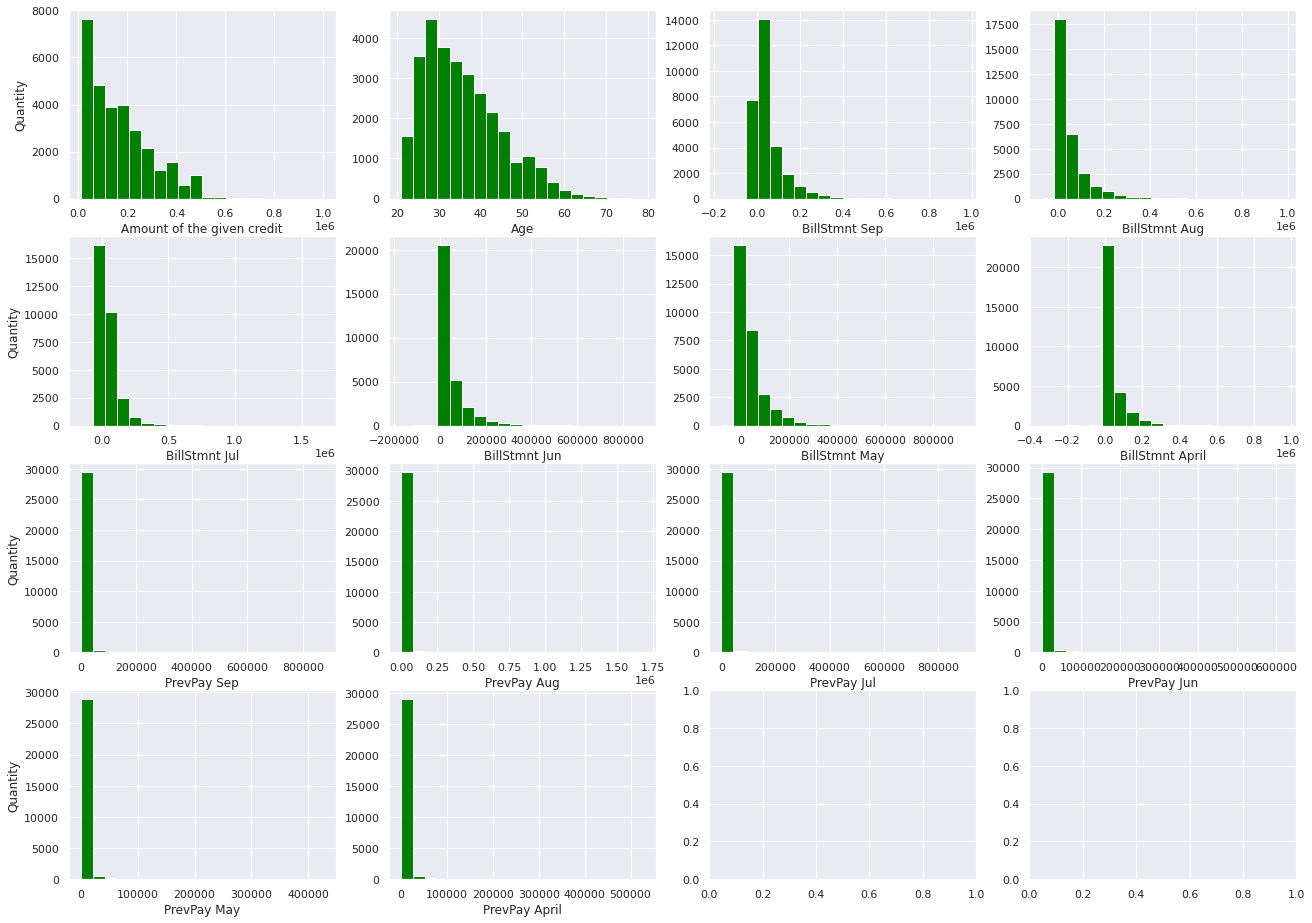

In [169]:
sns.set(rc={'figure.figsize':(22,16)})
fig, axes = plt.subplots(4, 4) 

for i in range(len(df_var_num2)):
  name = df_var_num2[i]
  plt.subplot(4,4,i+1) 
  plt.hist(df[name], bins = 20, color = 'Green')
  plt.xlabel(df_var_num2[i])
  if i == 0 or i == 4 or i == 8 or i == 12:
    plt.ylabel("Quantity")

Histogramas de datos númericos normalizados

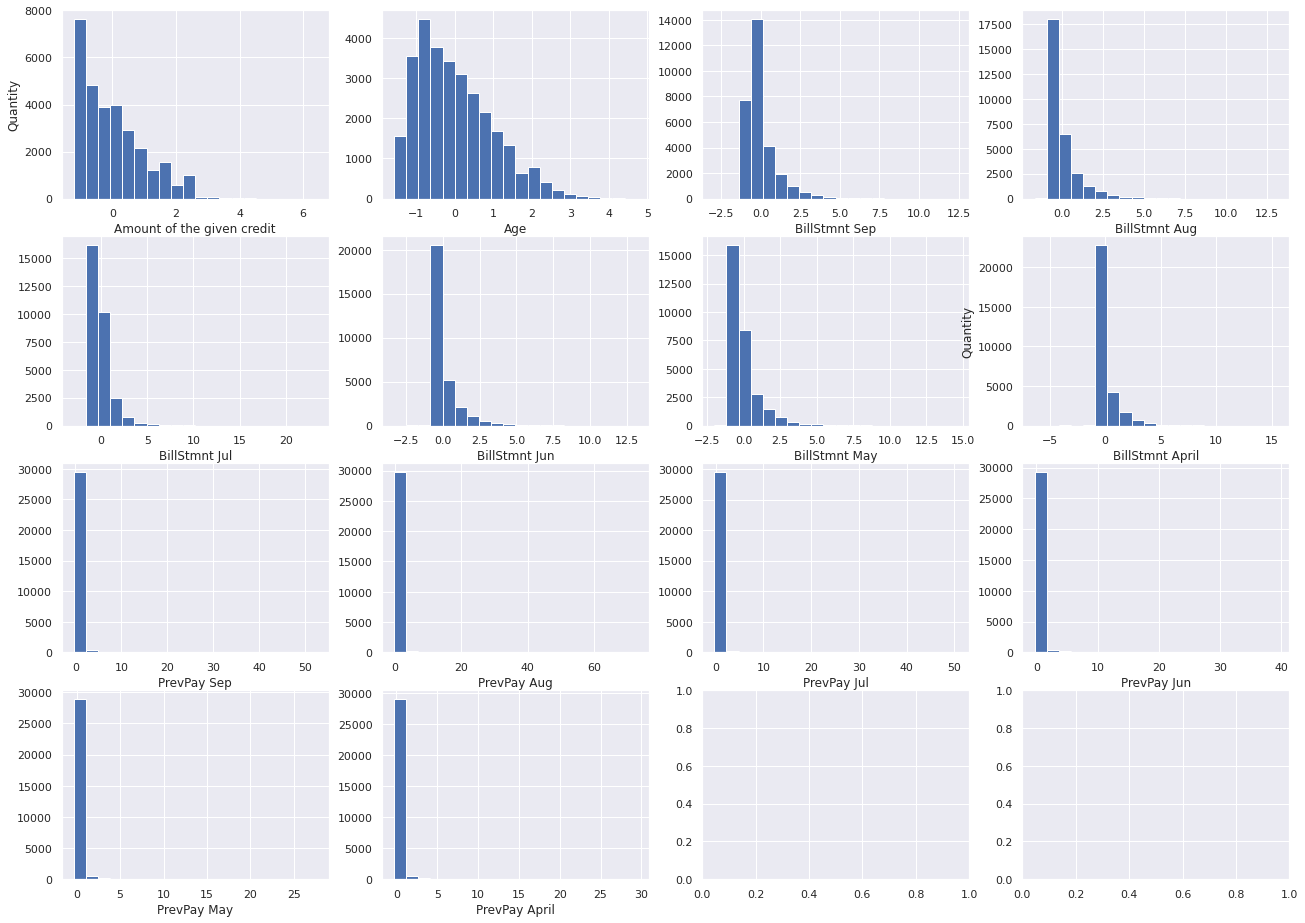

In [104]:
sns.set(rc={'figure.figsize':(22,16)})
fig, axes = plt.subplots(4, 4) 

for i in range(len(df_var_num2)):
  name = df_var_num2[i]
  plt.subplot(4,4,i+1) 
  plt.hist(dftransf[name], bins = 20)
  plt.xlabel(df_var_num2[i])
  if i == 0 or i == 7 or i == 14:
    plt.ylabel("Quantity")


### 9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

In [170]:
df_var_categorical_all

['Marital Status', 'Gender', 'Education']

In [171]:
df['Marital Status'].value_counts().index.values

array([2., 1., 3.])

Text(0.5, 0, 'y')

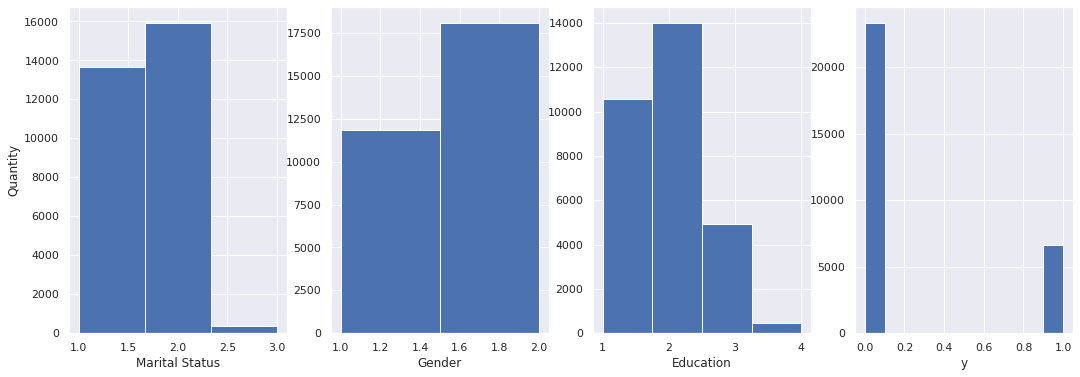

In [172]:
sns.set(rc={'figure.figsize':(18,6)})
fig, axes = plt.subplots(1, 4) 

for i in range(len(df_var_categorical_all)):
  name = df_var_categorical_all[i]
  plt.subplot(1,4,i+1) 
  plt.hist(df[name], bins = df[name].value_counts().count())
  plt.xlabel(name)
  if i == 0:
    plt.ylabel("Quantity")

plt.subplot(1,4,4)
plt.hist(dftransf['y'])
plt.xlabel('y')

(-1.0, 13.923918627505099)

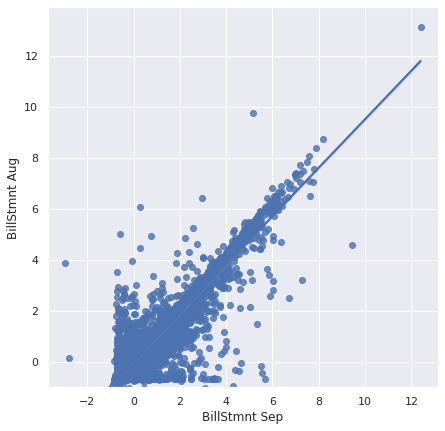

In [108]:
width = 7
height = 7
plt.figure(figsize=(width, height))
sns.regplot(x="BillStmnt Sep", y="BillStmnt Aug", data=dftransf)
plt.ylim(-1,)

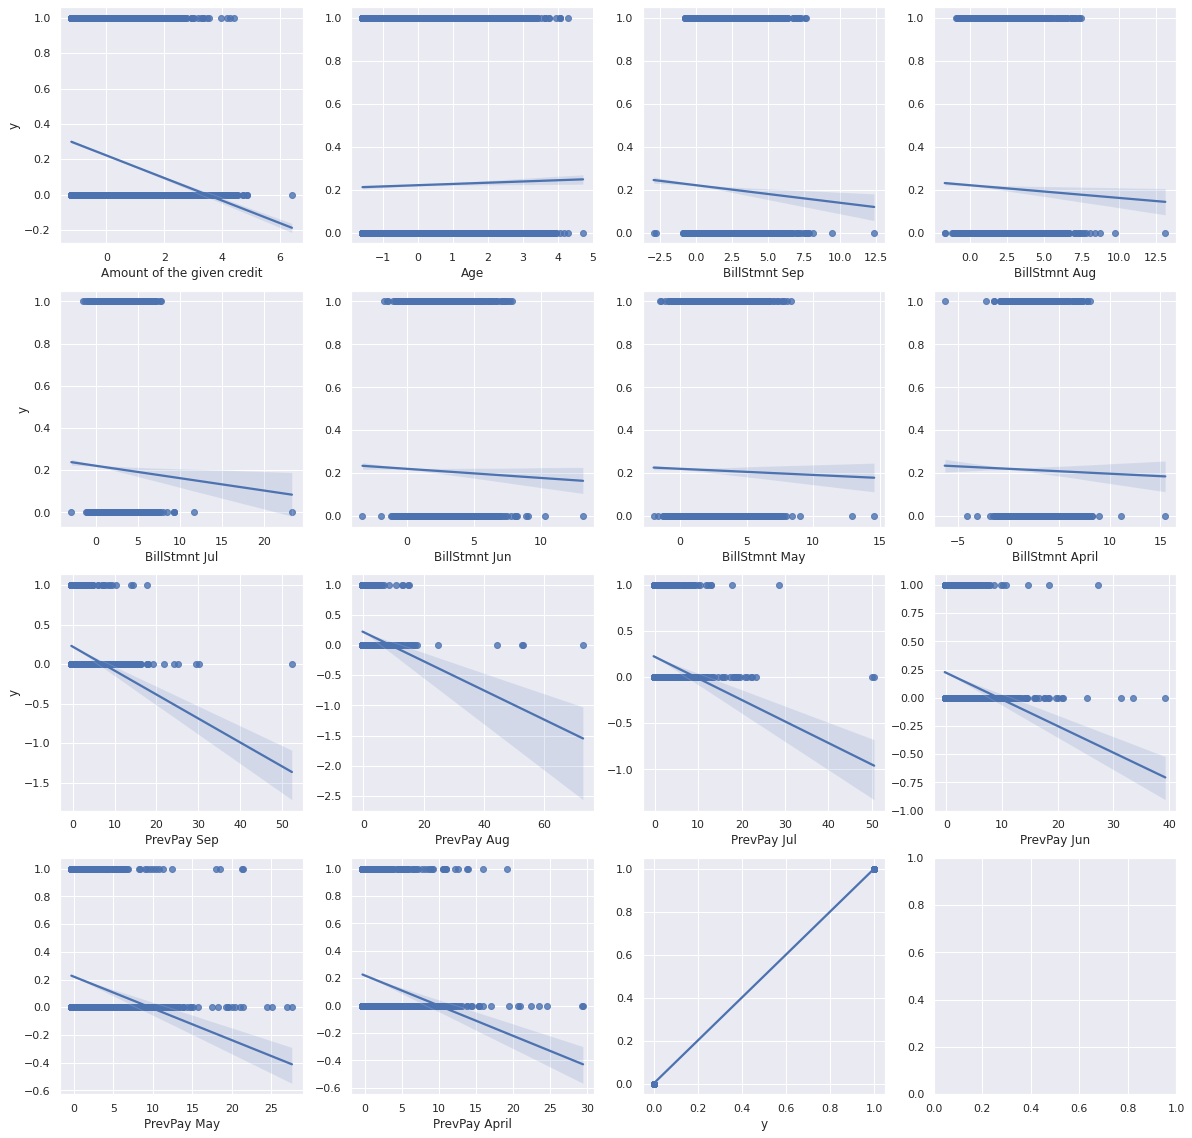

In [177]:
sns.set(rc={'figure.figsize':(20,20)})
fig, axes = plt.subplots(4, 4) 

for i in range(len(df_var_num_y)):
  name = df_var_num_y[i]
  plt.subplot(4,4,i+1) 
  sns.regplot(x = dftransf[name], y='y', data=dftransf, scatter = True)
  plt.xlabel(name)
  if i == 0 or i == 4 or i == 8 or i == 16:
    plt.ylabel("y")
  else:
    plt.ylabel(None)


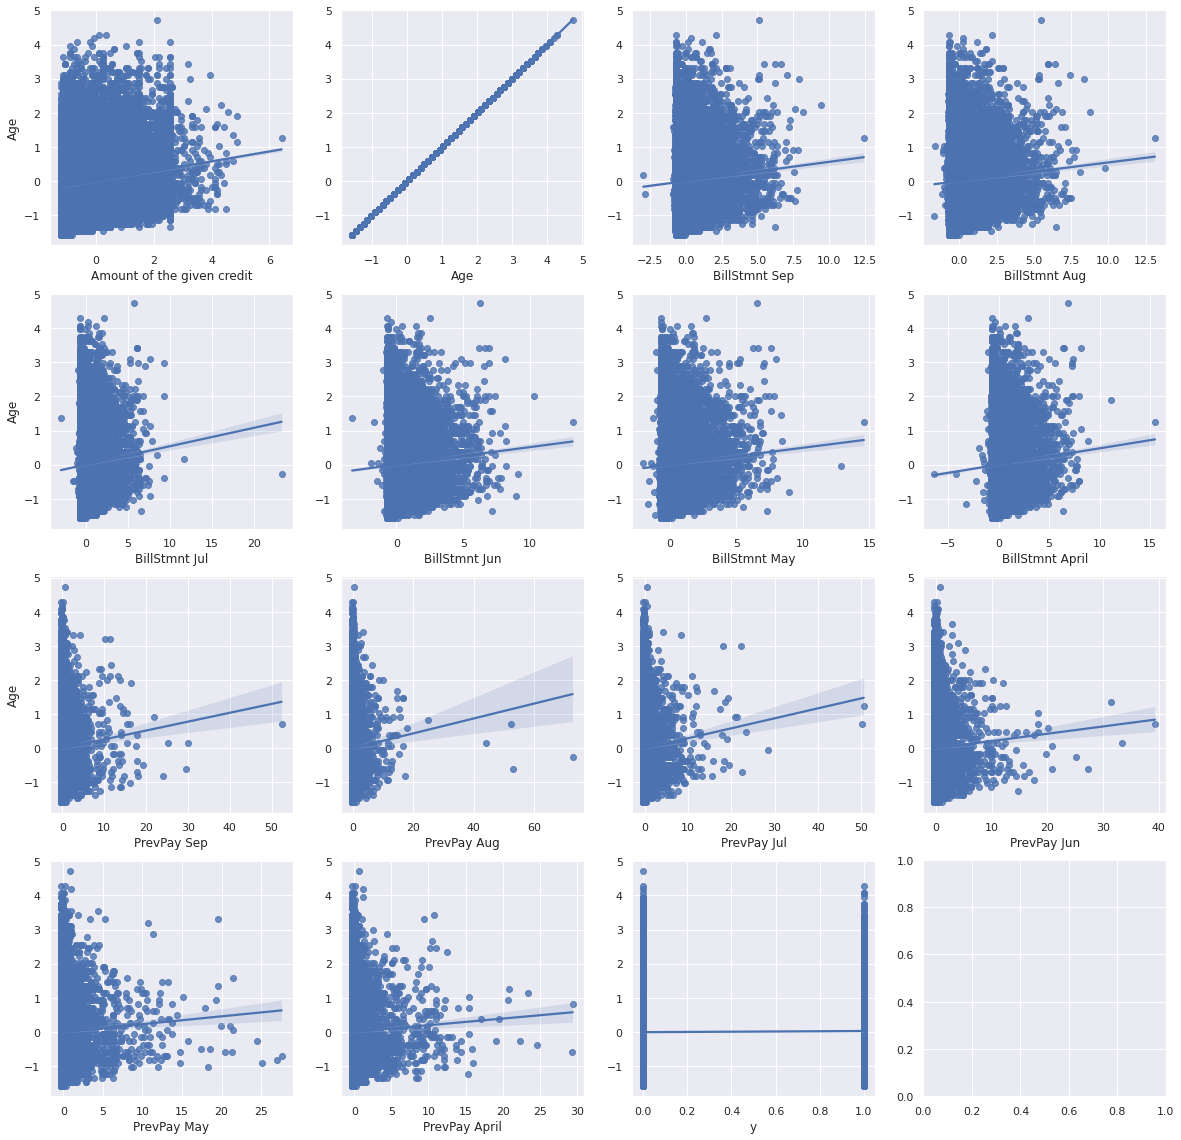

In [178]:
sns.set(rc={'figure.figsize':(20,20)})
fig, axes = plt.subplots(4, 4) 

for i in range(len(df_var_num_y)):
  name = df_var_num_y[i]
  plt.subplot(4,4,i+1) 
  sns.regplot(x = dftransf[name], y='Age', data=dftransf, scatter = True)
  plt.xlabel(name)
  if i == 0 or i == 4 or i == 8 or i == 16:
    plt.ylabel("Age")
  else:
    plt.ylabel(None)

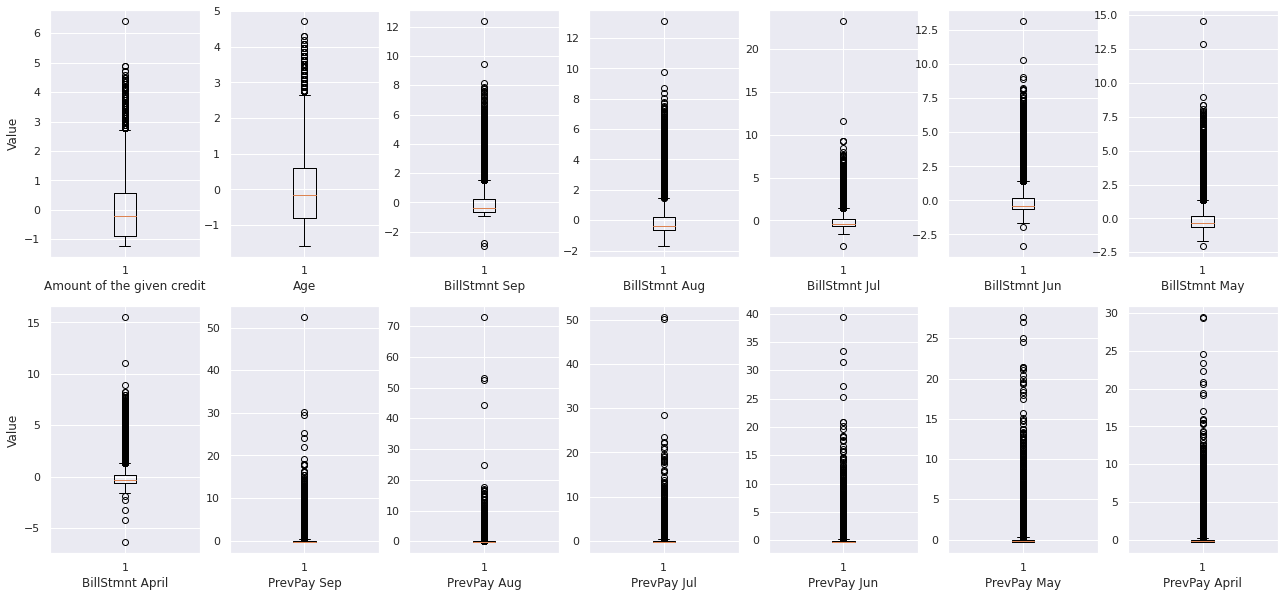

In [34]:
sns.set(rc={'figure.figsize':(22,10)})
fig, axes = plt.subplots(2, 7) 

for i in range(len(df_var_num2)):
  name = df_var_num2[i]
  plt.subplot(2,7,i+1) 
  plt.boxplot(dftransf[name])
  plt.xlabel(name)
  if i == 0 or i == 7:
    plt.ylabel("Value")

In [110]:
df['Education'].value_counts()

2.0    14009
1.0    10572
3.0     4909
4.0      468
Name: Education, dtype: int64

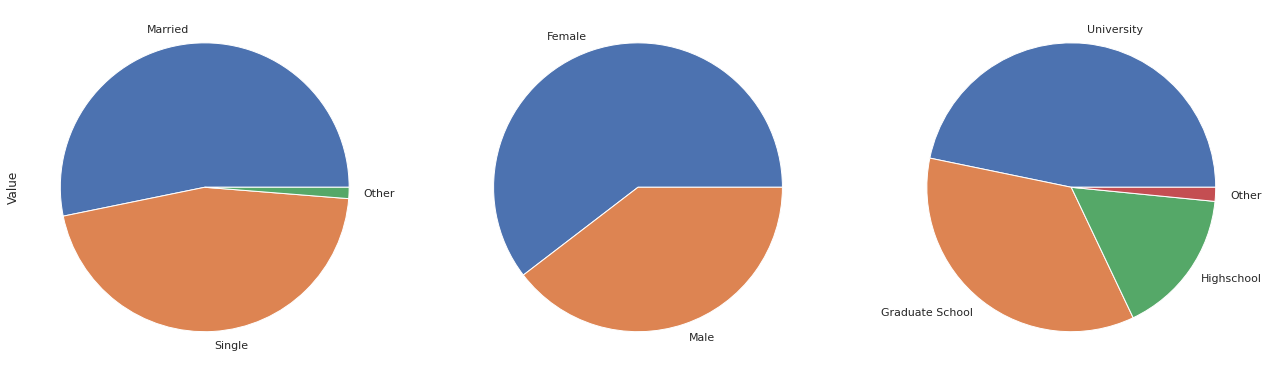

In [114]:
sns.set(rc={'figure.figsize':(22,10)})
fig, axes = plt.subplots(1, 3) 

piearray = np.ravel(df['Marital Status'])
plt.subplot(1,3,1)
plt.ylabel("Value")
plt.pie(df['Marital Status'].value_counts(),labels=['Married', 'Single', 'Other'])
########################################################################################################
piearray = np.ravel(df['Gender'])
plt.subplot(1,3,2)

plt.pie(df['Gender'].value_counts(),labels=['Female', 'Male'])
########################################################################################################  
piearray = np.ravel(df['Education'])
plt.subplot(1,3,3)

plt.pie(df['Education'].value_counts(),labels=['University', 'Graduate School', 'Highschool', 'Other'])
  
plt.show() 
  

### 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

#### **Grafica de Conteo**

Nos permite observar la dispersión de nuestros datos y ver en que valores estamos teniendo una mayor cantidad de incidencias. Pudieramos tambien tomar estos datos para determinar que clase de conclusiones son adecuadas por ejemplo, si encontramos que la edad se correlaciona fuertemente con si un cliente será bueno al momento de pagar o no pudieramos generalizar esto para todas las edades y para tanto hombres como mujeres, a menos que tengamos una muestra representativa de lo que queramos afirmar.

#### **Grafica de Disperción y Línealidad**

Nos permite observar gráficamente la dispersión de los datos y poder influir si existe correlación líneal entre factores estudiados. Como podemos ver del primer grupo de gráficas de este tipo, observamos como los diferentes factores númericos estan impactando en el tener o no un buen cliente.

Observamos que:

A pesar de no ser una correlación lineal muy fuerte, a medida que aumentamos la cantidad de crédito dado, tendemos en tener malos clientes.

En lo que respecta al segundo grupo de gráficas estamos analizando la relación de las variables con respecto a la edad, otro factor interesante, e aqui vemos que en cierta medida existe una relacion lineal entre la edad y de igual manera la cantidad de crédito dado

#### **Gráfica de Caja y Bigote**

Esta gráfica nos permite apreciar de que manera se estan distribuyendo nuestros datos, al haber convertido los datos en base a una escala normal, observamos aquellos outliers de datos

#### **Grafica de Pastel**

Podemos observar la distribución de nuestras variables categoricas y binarias. Esto nos sirve precisamente para no caer en conjeturas y generalizaciones erroneas, solo podemos llegar a una conclusión que abarque la muestra de estudio. 

Dado que PCA no se recomienda para variables categoricas, a pesar de haberles realizado un OneHotEncoder, se necesita de otro tipo de técnica para su analisis e interrelación.

## **Fin de la Actividad Semanal 6 -- Saludos!**